# Beer Dataset: DATA SCIENCE CASE-STUDY

# Exploratory Data Analysis

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.simplefilter(action='ignore')

In [40]:
df = pd.read_csv('train.csv')

In [41]:
df.head(4)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76


In [42]:
df.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'],
      dtype='object')

In [43]:
df.dtypes

index                  int64
beer/ABV             float64
beer/beerId            int64
beer/brewerId          int64
beer/name             object
beer/style            object
review/appearance    float64
review/aroma         float64
review/overall       float64
review/palate        float64
review/taste         float64
review/text           object
review/timeStruct     object
review/timeUnix        int64
user/ageInSeconds    float64
user/birthdayRaw      object
user/birthdayUnix    float64
user/gender           object
user/profileName      object
dtype: object

Text(0, 0.5, 'Count')

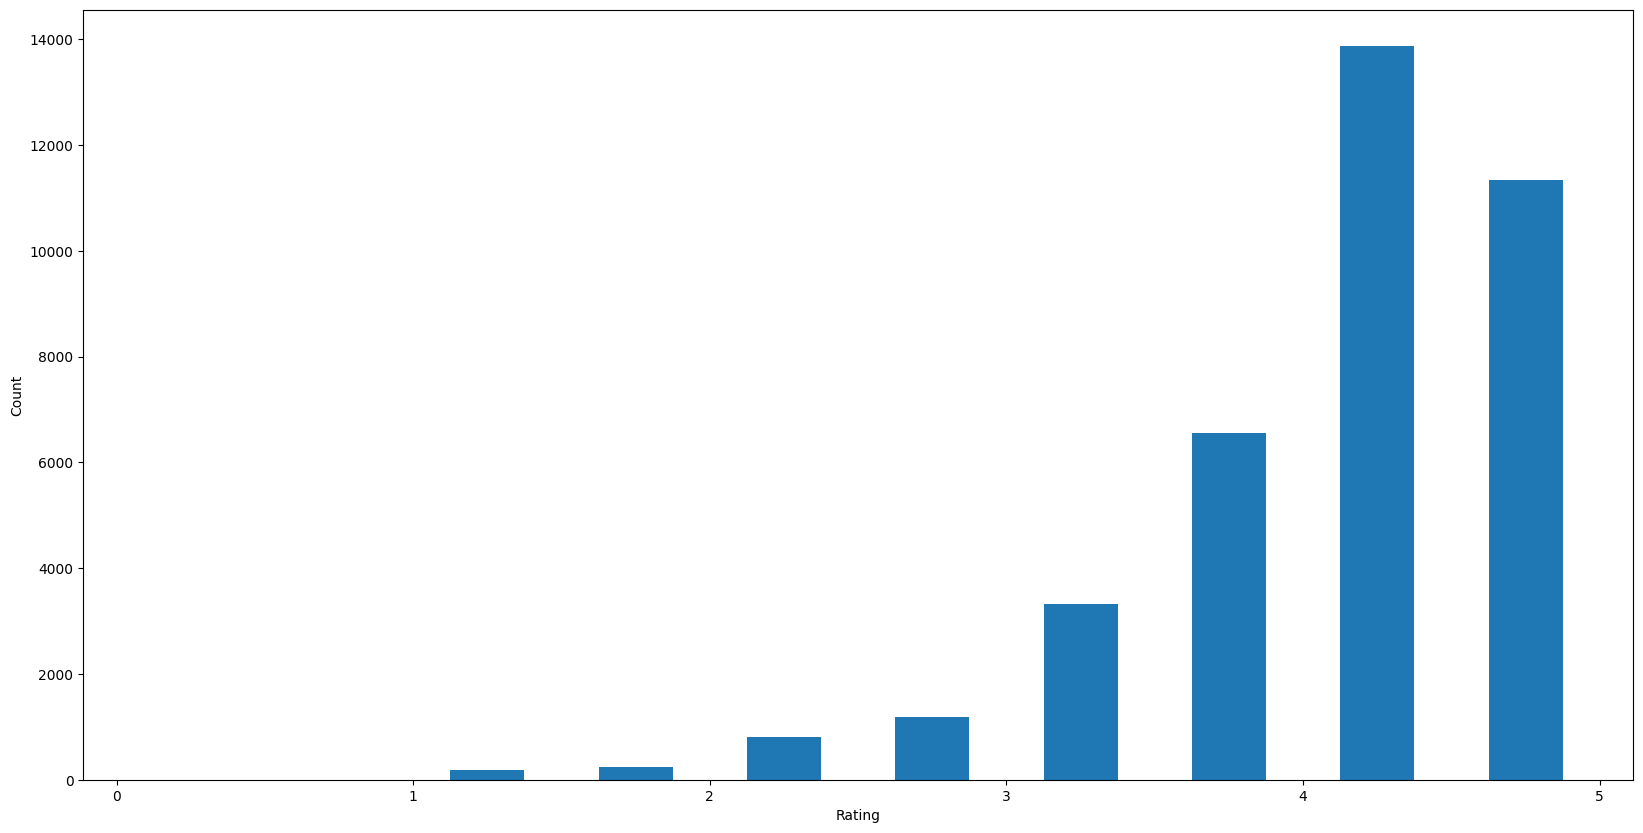

In [44]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df["review/overall"], rwidth=0.5)
plt.xlabel("Rating")
plt.ylabel("Count")

In [45]:
mean_ratings_by_style = df.groupby('beer/style')['review/overall'].mean()

In [46]:
# Sort in descending order
top_20_high = mean_ratings_by_style.sort_values(ascending=False).head(20)
top_20_low = mean_ratings_by_style.sort_values(ascending=True).head(20)

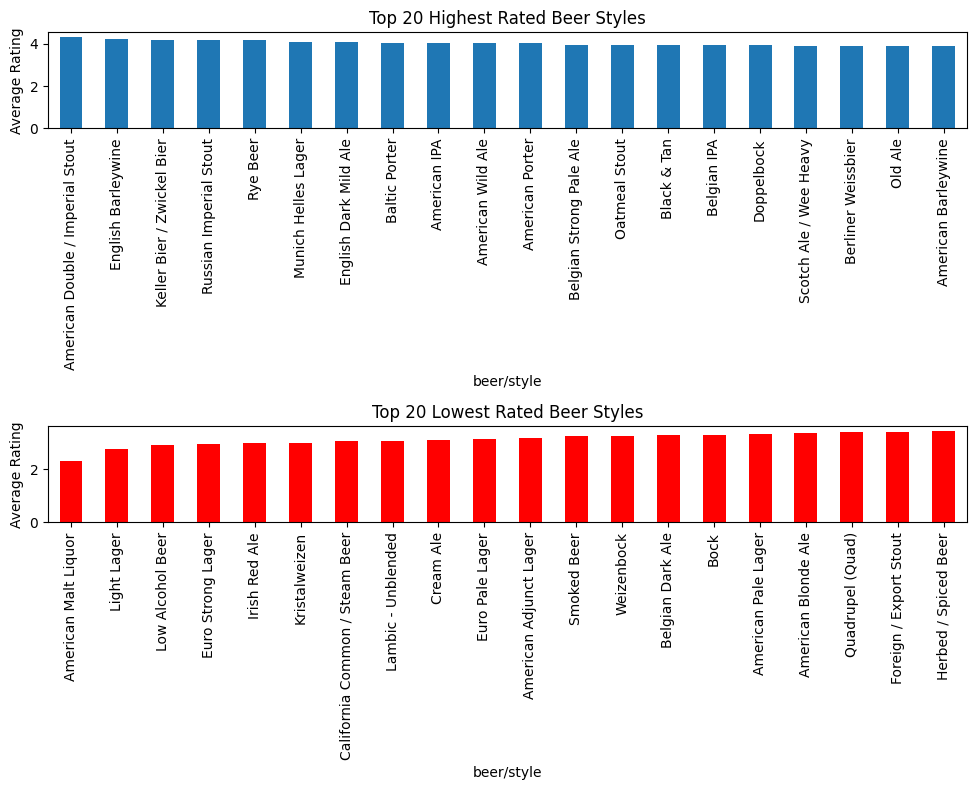

In [47]:
# Create bar plots
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Top 10 Highest Rated
top_20_high.plot(kind='bar', ax=axes[0], title="Top 20 Highest Rated Beer Styles")
axes[0].set_ylabel("Average Rating")

# Top 10 Lowest Rated
top_20_low.plot(kind='bar', ax=axes[1], title="Top 20 Lowest Rated Beer Styles", color='red')
axes[1].set_ylabel("Average Rating")

plt.tight_layout()
plt.show()

In [48]:
mean_ratings_by_name = df.groupby('beer/name')['review/overall'].mean()
mean_ratings_by_name

beer/name
"The Wind Cried Mari..." Scottish Heather Ale    3.950000
'Pooya Porter                                    4.000000
1 A.M. Ale                                       2.666667
10 Blocks South                                  3.500000
10 Year Clelebration Ale                         4.000000
                                                   ...   
Zlatorog                                         3.347222
Zorg                                             1.750000
Âaibo                                           2.651515
Ãgte Fynsk Boghvedebryg                         3.500000
Ãli                                             1.750000
Name: review/overall, Length: 1688, dtype: float64

In [49]:
mean_ratings_by_name.sort_values(ascending=False).head(20)

beer/name
Javaspresso Nitro Stout                                         5.0
Saisonnaire                                                     5.0
Cauldron Brew                                                   5.0
Farmhouse Ale                                                   5.0
Biere Blanche                                                   5.0
Limping Mallard                                                 5.0
Ackerman's Imperial Double Stout (Winterfest Replicale 2011)    5.0
BourbonDog ESB                                                  5.0
Gene's American Brown Ale                                       5.0
Quinn's Marathon Mild                                           5.0
Centennial Pale Ale                                             5.0
Amarillo Single Hop Pale Ale                                    5.0
Final Countdown                                                 5.0
Suicide By Hops                                                 5.0
Chocolate Nutter                      

In [50]:
mean_ratings_by_name.sort_values(ascending=True).head(20)

beer/name
Valhalla IPA                               1.00
Cocka-Too                                  1.00
AnimÃ©e Clear Beer                         1.00
Swan MID                                   1.00
Great Dane Pale Ale                        1.00
Camino Real Common                         1.00
Rege                                       1.00
Midnight Lager                             1.25
Sausa Weizen                               1.50
Karmi Classic                              1.50
Harboe Ã
rgangssbryg                       1.50
Otro Mundo Nut Brown Ale                   1.50
Harboe Pilsner 2,8%                        1.50
Harboe Pilsner                             1.50
Yella Belly Organic Ale                    1.50
Harboe Premium Traditional Pilsner 4.6%    1.50
EMU Bitter                                 1.75
Founders Noble Lager                       1.75
Sakara King                                1.75
Trafalgar Bock Lager                       1.75
Name: review/overall, dtype: f

In [51]:
# Sort in descending order
top_20_high = mean_ratings_by_name.sort_values(ascending=False).head(20)
top_20_low = mean_ratings_by_name.sort_values(ascending=True).head(20)

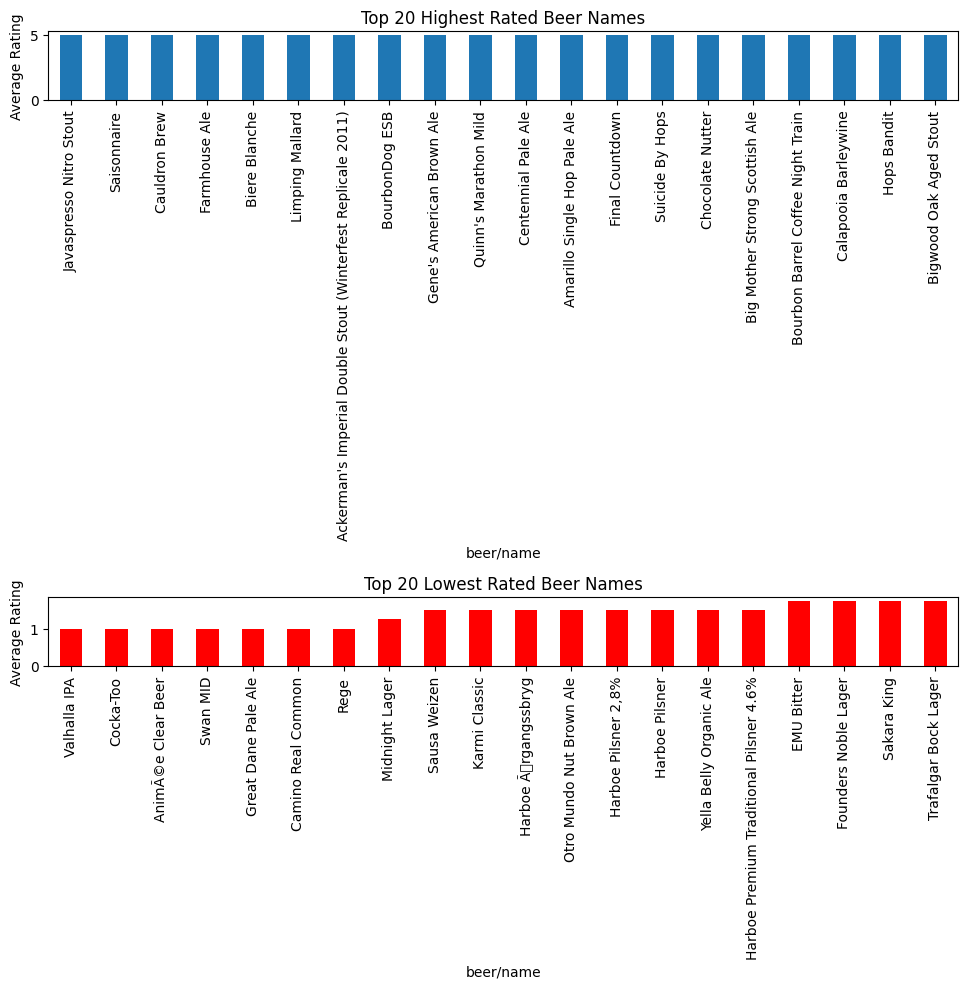

In [52]:
# Create bar plots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Top 10 Highest Rated
top_20_high.plot(kind='bar', ax=axes[0], title="Top 20 Highest Rated Beer Names")
axes[0].set_ylabel("Average Rating")

# Top 10 Lowest Rated
top_20_low.plot(kind='bar', ax=axes[1], title="Top 20 Lowest Rated Beer Names", color='red')
axes[1].set_ylabel("Average Rating")
plt.tight_layout()
plt.show()

In [73]:
print(df['beer/ABV'].max())
print(df['beer/ABV'].min())

57.7
0.1


<Axes: xlabel='beer/ABV', ylabel='review/overall'>

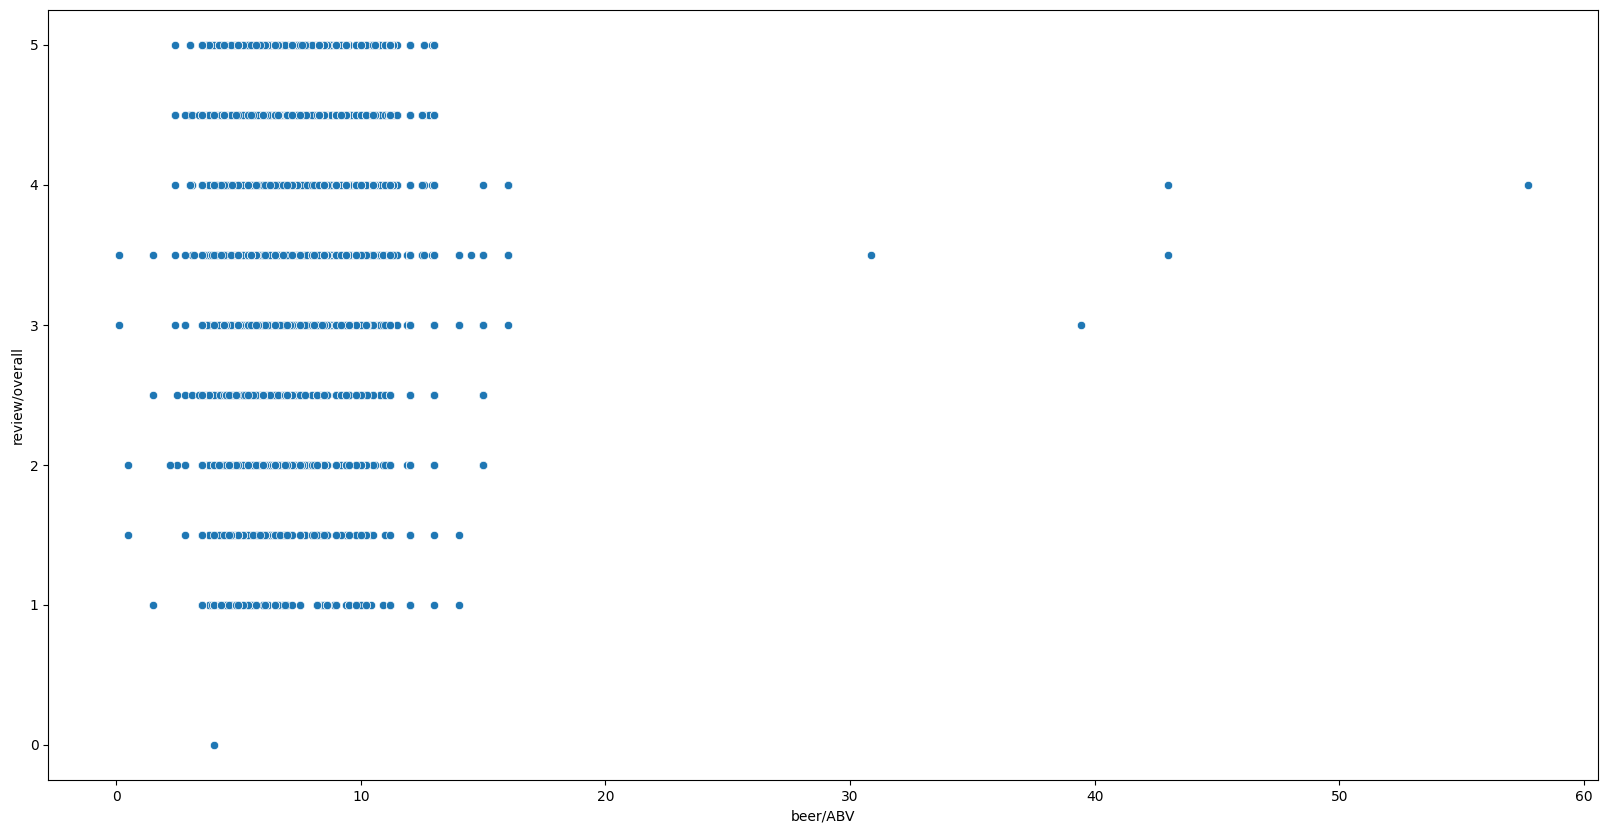

In [74]:
sns.scatterplot(data=df, x='beer/ABV', y='review/overall')

# Cleaning and Preprocessing

In [75]:
print('No of duplicates: {}'.format(sum(df.duplicated())))

No of duplicates: 0


In [76]:
df.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

In [77]:
# Displaying the percentage of missing values for each column for better insight
missing_values = df.isnull().mean() * 100
missing_values[missing_values > 0]

review/text           0.026667
user/ageInSeconds    79.050667
user/birthdayRaw     79.050667
user/birthdayUnix    79.050667
user/gender          59.162667
user/profileName      0.013333
dtype: float64

In [78]:
# Drop unnecessary columns 
columns_to_drop = ['index', 'beer/beerId', 'beer/brewerId', 
                   'user/ageInSeconds', 'user/birthdayRaw', 
                   'user/birthdayUnix', 'user/gender', 'review/timeStruct', 
                   'user/profileName', 'review/timeUnix']
df1 = df.drop(columns=columns_to_drop)
df1

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
0,5.00,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...
1,11.00,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...
2,4.70,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...
3,4.40,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...
4,4.40,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...
...,...,...,...,...,...,...,...,...,...
37495,5.50,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....
37496,8.50,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...
37497,4.75,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...
37498,11.20,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...


In [79]:
df1.isnull().sum()

beer/ABV              0
beer/name             0
beer/style            0
review/appearance     0
review/aroma          0
review/overall        0
review/palate         0
review/taste          0
review/text          10
dtype: int64

In [80]:
df2 = df1.dropna()
df2

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
0,5.00,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...
1,11.00,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...
2,4.70,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...
3,4.40,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...
4,4.40,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...
...,...,...,...,...,...,...,...,...,...
37495,5.50,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....
37496,8.50,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...
37497,4.75,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...
37498,11.20,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...


In [81]:
df2.isnull().sum()

beer/ABV             0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
dtype: int64

In [82]:
beer_name_stats = df2['beer/name'].value_counts()
beer_name_stats

beer/name
Founders Breakfast Stout                   1883
Founders KBS (Kentucky Breakfast Stout)    1439
Founders Centennial IPA                    1063
Founders Red's Rye PA                      1051
Founders Dirty Bastard                      983
                                           ... 
Bluffdiver IPA                                1
Montgomery Mild                               1
Willy's Crown Jewels                          1
Sokol Izolda                                  1
MoJo Belgian Style Abbey Dubbel               1
Name: count, Length: 1688, dtype: int64

In [83]:
len(beer_name_stats[beer_name_stats>10])

325

In [84]:
len(beer_name_stats[beer_name_stats<=10])

1363

In [85]:
beer_name_stats_less_than_10 = beer_name_stats[beer_name_stats<=10]
beer_name_stats_less_than_10 

beer/name
Founders Misty Mountain Hop Brown    10
Tijuana Morena                       10
Kiper Pils                           10
Reckoning                            10
Toubab Brewe                         10
                                     ..
Bluffdiver IPA                        1
Montgomery Mild                       1
Willy's Crown Jewels                  1
Sokol Izolda                          1
MoJo Belgian Style Abbey Dubbel       1
Name: count, Length: 1363, dtype: int64

In [86]:
df2['beer/name'] = df2['beer/name'].apply(lambda x: 'other' if x in beer_name_stats_less_than_10 else x)
len(df2['beer/name'].unique())

326

In [87]:
df2['beer/name'].value_counts()

beer/name
other                                      3508
Founders Breakfast Stout                   1883
Founders KBS (Kentucky Breakfast Stout)    1439
Founders Centennial IPA                    1063
Founders Red's Rye PA                      1051
                                           ... 
Harboe BjÃ¸rnebryg (Bear Beer)               11
Rajah's Royal IPA                            11
Victory Pale Ale                             11
Red Cuillin                                  11
Seson                                        11
Name: count, Length: 326, dtype: int64

In [88]:
beer_style_stats = df2['beer/style'].value_counts()
beer_style_stats

beer/style
American Double / Imperial Stout    4493
American IPA                        3048
American Double / Imperial IPA      2871
Scotch Ale / Wee Heavy              2133
Russian Imperial Stout              2030
                                    ... 
Kristalweizen                          6
Berliner Weissbier                     6
Eisbock                                5
BiÃ¨re de Garde                        4
Flanders Red Ale                       2
Name: count, Length: 95, dtype: int64

In [89]:
len(beer_style_stats[beer_style_stats>10])

82

In [90]:
df2

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
0,5.00,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...
1,11.00,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...
2,4.70,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...
3,4.40,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...
4,4.40,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...
...,...,...,...,...,...,...,...,...,...
37495,5.50,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....
37496,8.50,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...
37497,4.75,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...
37498,11.20,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...


In [91]:
# One hot encoding
df_one_hot_encoded = pd.get_dummies(df2, columns = ["beer/name", "beer/style"], drop_first=True, dtype=float)
df_one_hot_encoded

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,beer/name_1906 Reserva Especial,beer/name_5 Day IPA,beer/name_Aecht Schlenkerla Eiche,...,beer/style_Scotch Ale / Wee Heavy,beer/style_Scottish Ale,beer/style_Scottish Gruit / Ancient Herbed Ale,beer/style_Smoked Beer,beer/style_Tripel,beer/style_Vienna Lager,beer/style_Weizenbock,beer/style_Wheatwine,beer/style_Winter Warmer,beer/style_Witbier
0,5.00,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.00,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.70,3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.40,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.40,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,5.50,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37496,8.50,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37497,4.75,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37498,11.20,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
# Initialize TF-IDF vectorizer with basic parameters
tfidf = TfidfVectorizer(max_features=500, stop_words='english')

# Fit-transform 'review/text' to numerical features
tfidf_matrix = tfidf.fit_transform(df_one_hot_encoded['review/text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Step 3: Combining TF-IDF features with the main dataset
df_final = pd.concat([df_one_hot_encoded.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# Step 4: Dropping the original text column as it's now encoded
df_final = df_final.drop(columns=['review/text'])

df_final

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,beer/name_1906 Reserva Especial,beer/name_5 Day IPA,beer/name_Aecht Schlenkerla Eiche,beer/name_Aecht Schlenkerla Fastenbier,...,wish,wonderful,wood,woody,worth,wouldn,wow,year,yeast,yellow
0,5.00,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,11.00,4.0,3.5,3.5,3.5,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,4.70,3.5,4.0,3.5,3.5,3.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,4.40,3.0,3.0,2.5,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,4.40,4.0,3.0,3.0,3.5,2.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37485,5.50,4.0,3.5,3.5,3.5,3.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.172746,0.000000,0.0,0.0,0.0,0.0
37486,8.50,4.5,4.0,3.5,4.5,4.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.174156,0.0,0.0,0.0,0.0
37487,4.75,4.0,3.5,4.0,4.5,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
37488,11.20,4.0,4.0,4.0,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [93]:
scaler = StandardScaler()
numerical_features = ['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste']

df_final[numerical_features] = scaler.fit_transform(df_final[numerical_features])
df_final

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,beer/name_1906 Reserva Especial,beer/name_5 Day IPA,beer/name_Aecht Schlenkerla Eiche,beer/name_Aecht Schlenkerla Fastenbier,...,wish,wonderful,wood,woody,worth,wouldn,wow,year,yeast,yellow
0,-1.036823,0.169957,0.186365,4.0,0.217528,0.108486,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1.551636,0.169957,-0.548085,3.5,-0.530992,-1.287236,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,-1.166246,-0.679376,0.186365,3.5,-0.530992,-0.589375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,-1.295669,-1.528709,-1.282534,2.5,-1.279511,-1.287236,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,-1.295669,0.169957,-1.282534,3.0,-0.530992,-1.985096,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37485,-0.821118,0.169957,-0.548085,3.5,-0.530992,-0.589375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.172746,0.000000,0.0,0.0,0.0,0.0
37486,0.473111,1.019290,0.186365,3.5,0.966047,0.806346,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.174156,0.0,0.0,0.0,0.0
37487,-1.144675,0.169957,-0.548085,4.0,0.966047,0.108486,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
37488,1.637918,0.169957,0.186365,4.0,1.714567,1.504207,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [94]:
df_final['review/overall'].value_counts()

review/overall
4.0    13867
4.5     8662
3.5     6550
3.0     3319
5.0     2667
2.5     1193
2.0      807
1.5      248
1.0      176
0.0        1
Name: count, dtype: int64

In [95]:
df_final['review/overall'] = df_final['review/overall'].round().astype(int)
df_final = df_final[df_final['review/overall']>0]
df_final

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,beer/name_1906 Reserva Especial,beer/name_5 Day IPA,beer/name_Aecht Schlenkerla Eiche,beer/name_Aecht Schlenkerla Fastenbier,...,wish,wonderful,wood,woody,worth,wouldn,wow,year,yeast,yellow
0,-1.036823,0.169957,0.186365,4,0.217528,0.108486,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1.551636,0.169957,-0.548085,4,-0.530992,-1.287236,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,-1.166246,-0.679376,0.186365,4,-0.530992,-0.589375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,-1.295669,-1.528709,-1.282534,2,-1.279511,-1.287236,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,-1.295669,0.169957,-1.282534,3,-0.530992,-1.985096,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37485,-0.821118,0.169957,-0.548085,4,-0.530992,-0.589375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.172746,0.000000,0.0,0.0,0.0,0.0
37486,0.473111,1.019290,0.186365,4,0.966047,0.806346,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.174156,0.0,0.0,0.0,0.0
37487,-1.144675,0.169957,-0.548085,4,0.966047,0.108486,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
37488,1.637918,0.169957,0.186365,4,1.714567,1.504207,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [96]:
df_final['review/overall'].value_counts()

review/overall
4    29079
3     3319
5     2667
2     2248
1      176
Name: count, dtype: int64

In [97]:
# Define target variable and features
X = df_final.drop(columns=['review/overall'])
y = df_final['review/overall']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
print("Best params: k=", grid_search.best_params_)

# Fit the model
best_knn.fit(X_train, y_train)

# Predictions
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
knn_acc = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", knn_acc)

Best params: k= {'n_neighbors': 13}
Training Accuracy: 0.8390850588509886
Test Accuracy: 0.818351560416111


In [30]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.12      0.21        42
           2       0.68      0.61      0.64       444
           3       0.47      0.24      0.31       695
           4       0.85      0.96      0.90      5793
           5       0.58      0.20      0.30       524

    accuracy                           0.82      7498
   macro avg       0.68      0.43      0.47      7498
weighted avg       0.79      0.82      0.79      7498



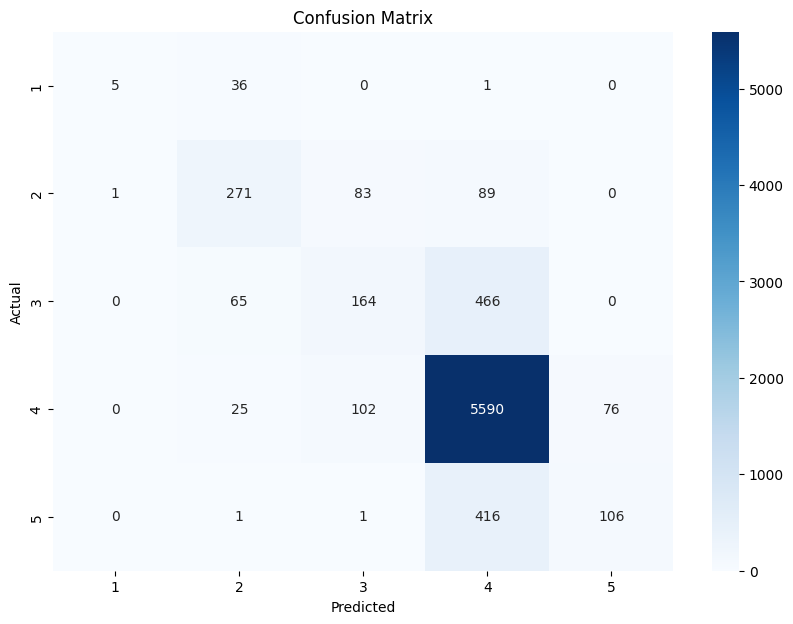

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
print("Best params:", grid_search.best_params_)

# Fit the best model
best_log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = best_log_reg.predict(X_train)
y_test_pred = best_log_reg.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
log_reg_acc = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", log_reg_acc)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Best params: {'C': 0.1, 'solver': 'lbfgs'}
Training Accuracy: 0.8433863492381047
Test Accuracy: 0.8323552947452654
Confusion Matrix:
 [[   4   38    0    0    0]
 [   0  299   77   68    0]
 [   0   65  194  434    2]
 [   0   24   75 5611   83]
 [   0    1    1  389  133]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.10      0.17        42
           2       0.70      0.67      0.69       444
           3       0.56      0.28      0.37       695
           4       0.86      0.97      0.91      5793
           5       0.61      0.25      0.36       524

    accuracy                           0.83      7498
   macro avg       0.75      0.45      0.50      7498
weighted avg       0.81      0.83      0.81      7498



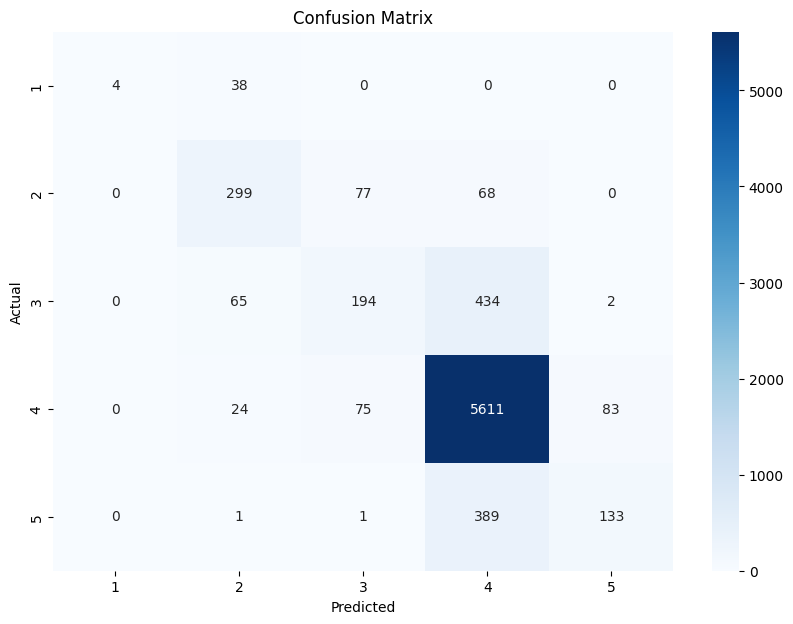

In [100]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_log_reg.classes_, yticklabels=best_log_reg.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.7555348092824753
[[  16   22    4    0    0]
 [   8  236  127   72    1]
 [   0  111  220  360    4]
 [   0   88  340 5025  340]
 [   0    2    6  348  168]]
              precision    recall  f1-score   support

           1       0.67      0.38      0.48        42
           2       0.51      0.53      0.52       444
           3       0.32      0.32      0.32       695
           4       0.87      0.87      0.87      5793
           5       0.33      0.32      0.32       524

    accuracy                           0.76      7498
   macro avg       0.54      0.48      0.50      7498
weighted avg       0.76      0.76      0.76      7498



In [103]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best'],
    'min_samples_leaf':[1,2,5],
    'min_samples_split':[2,5],
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=5, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5], 'splitter': ['best']},
             verbose=1)

In [104]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [105]:
grid_search_dt.best_score_

np.float64(0.831916200771708)

In [106]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8342502750825248
0.8278207522005868
[[   8   34    0    0    0]
 [   0  317   66   61    0]
 [   0   87  220  385    3]
 [   0   36  135 5538   84]
 [   0    1    1  398  124]]
              precision    recall  f1-score   support

           1       1.00      0.19      0.32        42
           2       0.67      0.71      0.69       444
           3       0.52      0.32      0.39       695
           4       0.87      0.96      0.91      5793
           5       0.59      0.24      0.34       524

    accuracy                           0.83      7498
   macro avg       0.73      0.48      0.53      7498
weighted avg       0.80      0.83      0.81      7498



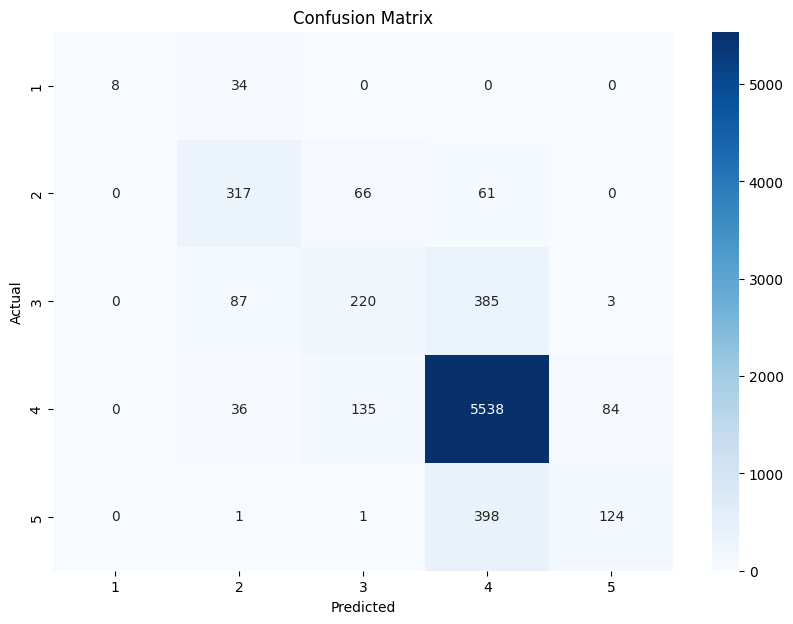

In [107]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=DT.classes_, yticklabels=DT.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

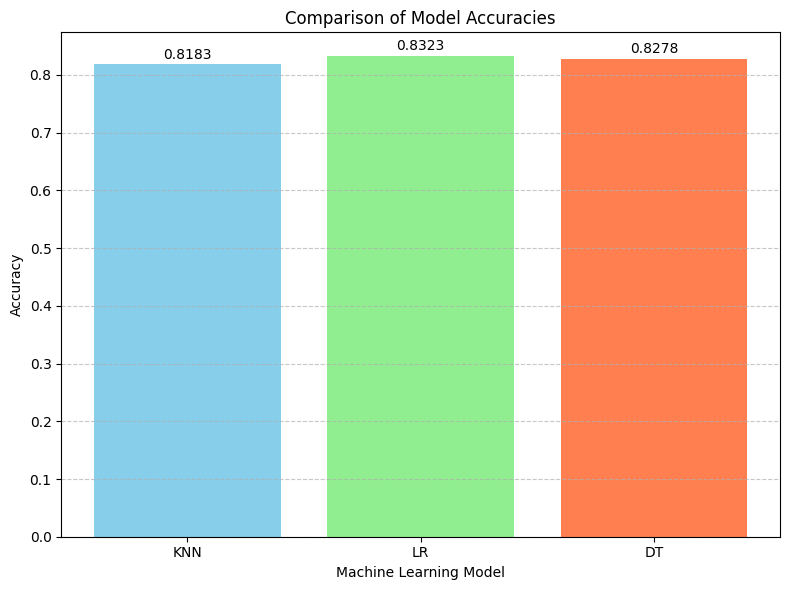

In [110]:
# Data (assuming you have these values)
models = ['KNN', 'LR', 'DT']
accuracy = [0.8183, 0.8323, 0.8278]

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
plt.bar(models, accuracy, color=['skyblue', 'lightgreen', 'coral'])
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Annotate data points (accuracy values) above bars
for i, value in enumerate(accuracy):
    plt.text(i, value + 0.005, f"{value:.4f}", ha='center', va='bottom')  # Add slight offset for better visibility

# Customize grid and axes
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig("model_accuracies.png") 

plt.show()
